# Illustrative figures for TriDeNT

In [1]:
import os
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict


plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'



In [26]:
FIG_PATH = "/Users/vikrantjaltare/Documents/GitHub/TriDeNT/Figures"

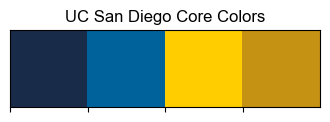

In [49]:
## ucsd palette

# Define UC San Diego color palettes
ucsd_core_colors = {
    'UC San Diego Navy': '#182B49',
    'UC San Diego Blue': '#00629B',
    'UC San Diego Yellow': '#FFCD00',
    'UC San Diego Gold': '#C69214'
}

ucsd_accent_colors = {
    'Turquoise': '#00C6D7',
    'Magenta': '#D462AD',
    'Sand': '#F5F0E6',
    'Citron': '#F3E500',
    'Orange': '#FC8900',
    'Green': '#6E963B'
}

ucsd_neutral_colors = {
    'Black': '#000000',
    'Cool Gray': '#747678',
    'Stone': '#B6B1A9',
    'White': '#FFFFFF'
}

# Create Seaborn color palettes
ucsd_core_palette = sns.color_palette(list(ucsd_core_colors.values()))
ucsd_accent_palette = sns.color_palette(list(ucsd_accent_colors.values()))
ucsd_neutral_palette = sns.color_palette(list(ucsd_neutral_colors.values()))

# Example usage in a Seaborn plot
sns.palplot(ucsd_core_palette)
plt.title("UC San Diego Core Colors")
plt.show()


In [137]:
## define ternary thresholding activation function
def ternary_activation(x, thresholds):
    """
    Ternary activation function
    """


    # threshold
    t1, t2 = thresholds
    s = jnp.where(
        x < t1, -1.0,
        jnp.where(
            x > t2, 1.0,
            0.0
        )
    )

    return s

## define ternary thresholding activation function with noise
def noisy_ternary_activation(x, thresholds, noise_sd, key):
    """
    Ternary activation function
    """
    # key, key2 = jax.random.split(key, 2)

    # generate noise
    noise = jax.random.normal(key = key, shape = x.shape) * noise_sd

    # inject noise
    x = x + noise


    # threshold
    t1, t2 = thresholds
    s = jnp.where(
        x < t1, -1.0,
        jnp.where(
            x > t2, 1.0,
            0.0
        )
    )

    return s

## helper function
@jax.jit
def gaussian_cdf(x, mu, sigma):
    return jax.scipy.stats.norm.cdf(x, loc = mu, scale = sigma)

@jax.jit
def gaussian_pdf(x, mu, sigma):
    return jax.scipy.stats.norm.pdf(x, loc = mu, scale = sigma)

@jax.jit
def expected_state(x, thresholds, noise_sd):
    t1, t2 = thresholds
    e = ((1 - gaussian_cdf(x = t2 - x, mu = 0, sigma = noise_sd)) - gaussian_cdf(x = t1 - x, mu = 0, sigma = noise_sd))
    return e

@jax.jit
def bin_expected_state(x, threshold, noise_sd):
    e = gaussian_cdf(x = x - threshold, mu = 0, sigma = noise_sd)
    return e


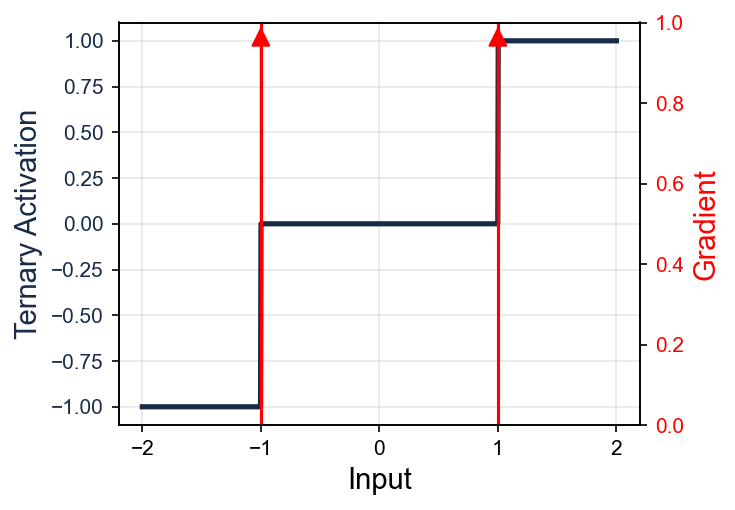

In [ ]:
# visualize ternary activation and it's gradient
y = jnp.linspace(-2, 2, 1000)
th = [-1.0, 1.0]
act = ternary_activation(y, th)
act_gr = jnp.diff(act)
act_gr = jnp.append(act_gr, 0)


pal_deep = sns.color_palette("deep", 8)
fig, ax1 = plt.subplots(dpi = 150, figsize = (5, 3.5))
ax2 = ax1.twinx()

ax1.plot(y, act, c = ucsd_core_palette[0], lw = 2.5)
ax1.set_ylabel("Ternary Activation", fontsize = 14, color = ucsd_core_palette[0])
ax1.tick_params(axis = 'y', labelcolor = ucsd_core_palette[0])

for t in th:
    ax2.axvline(x = t, c = 'r', lw = 1.5)
    ax2.annotate(
        "",
        xy = (t, 1.0),
        xytext=(t, 0.5),
        arrowprops = dict(facecolor='r', edgecolor='r', arrowstyle='-|>', mutation_scale=20) ,
        annotation_clip = False

    )

    ax2.set_ylabel("Gradient", fontsize = 14, color = 'r')
    ax2.tick_params(axis = 'y', labelcolor = 'r')

    ax1.set_xlabel("Input", fontsize = 14)

ax1.grid(alpha = .3)

plt.tight_layout()

# plt.savefig(FIG_PATH + "/ternary_act_grad_illustration.pdf", bbox_inches = 'tight', dpi = 300, transparent = True)

## Plotting the $\tilde{y}$

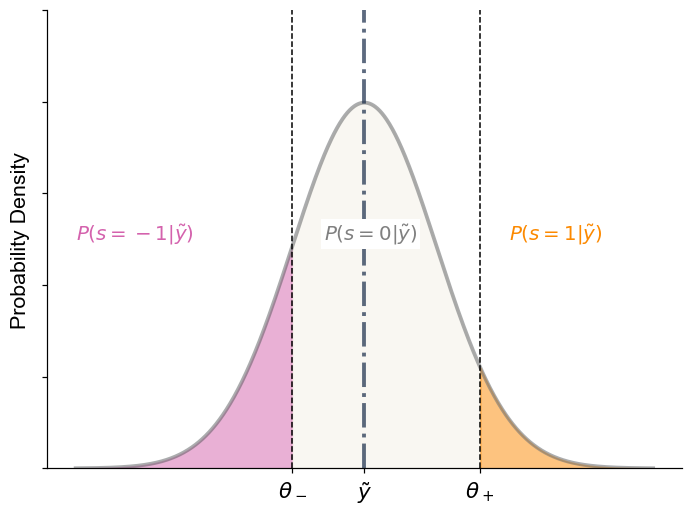

In [ ]:
y_bar = 0.0
y_tilde = y_bar
y_dis = gaussian_pdf(y, mu = y_bar, sigma = .5)
t1 = -.5
t2 = .8

fig, ax = plt.subplots(dpi = 110)
ax.plot(y, y_dis, c = ucsd_neutral_palette[1], lw = 2.5, alpha = .6)
ax.axvline(x = y_tilde, ls = '-.', c = ucsd_core_palette[0], lw = 2.5, alpha = 0.7)
ax.axvline(x = t1, ls = '--', c = ucsd_neutral_palette[0], lw = 1)
ax.axvline(x = t2, ls = '--', c = ucsd_neutral_palette[0], lw = 1)
ax.set_xticks([t1, y_tilde, t2])
ax.set_xticklabels([r"$\theta_-$",r"$\tilde{y}$", r"$\theta_+$"], fontsize = 14)
ax.fill_between(y, y_dis, where = y < t1, color = ucsd_accent_palette[1], alpha = .5)
ax.fill_between(y, y_dis, where=(y > t1) & (y < t2), color=ucsd_accent_palette[2], alpha=.5)
ax.fill_between(y, y_dis, where = y > t2, color = ucsd_accent_palette[4], alpha = .5)
ax.text(x = -2, y = 0.5, s = r"$P(s = -1 | \tilde{y})$", fontsize = 13, c = ucsd_accent_palette[1])
ax.text(x = -0.28, y = 0.5, s = r"$P(s = 0 | \tilde{y})$", fontsize = 13, c = "0.5", bbox=dict(facecolor='white', edgecolor='none', pad=2))
ax.text(x = 1., y = 0.5, s = r"$P(s = 1 | \tilde{y})$", fontsize = 13, c = ucsd_accent_palette[4])
ax.set_ylabel("Probability Density", fontsize = 14)
ax.set_yticklabels([])
ax.set_ylim([0, 1])

plt.tight_layout()
sns.despine()

# plt.savefig(FIG_PATH + "/stochastic_activation_illustration2.pdf", bbox_inches = 'tight', dpi = 300, transparent = True)

## Plotting the expected states and gradients

In [132]:
@jax.custom_vjp
def custom_ternary_gradient(x, thresholds, noise_sd, key):
    return noisy_ternary_activation(x = x, thresholds = thresholds, noise_sd = noise_sd, key = key) # call the ternary activation in the forward pass

def custom_ternary_gradient_fwd(x, thresholds, noise_sd, key):
    return custom_ternary_gradient(x, thresholds, noise_sd, key), (x, thresholds, noise_sd) # save the inputs, thresholds, noise_sd for the backward pass

def custom_ternary_gradients_bwd(residuals, grads):
    x, thresholds, noise_sd = residuals # unpack the residuals from forward pass
    t1, t2 = thresholds
    exp_state_grad = gaussian_pdf(x = t1 - x, mu = 0, sigma = noise_sd) + gaussian_pdf(x = t2 - x, mu = 0, sigma = noise_sd)
    return (exp_state_grad*grads, None, None, None)

custom_ternary_gradient.defvjp(custom_ternary_gradient_fwd, custom_ternary_gradients_bwd)

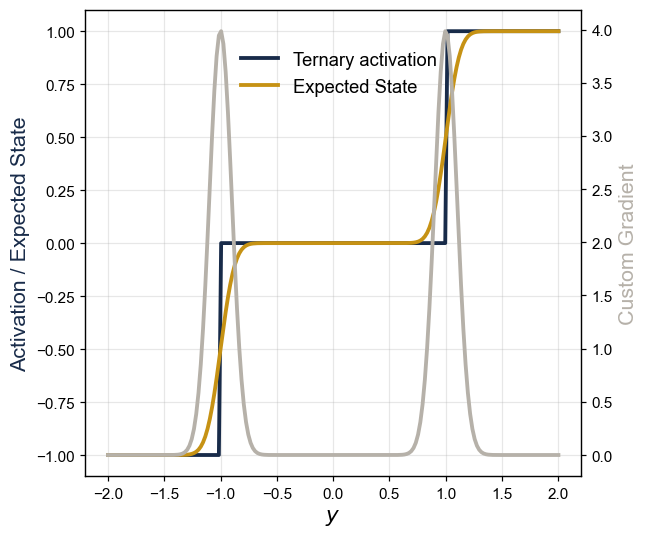

In [ ]:
## testing
t = jnp.linspace(-2, 2, 200)
th = [-1.0, 1.0]
noise_sd = 0.1
kk = jax.random.key(0)
act = ternary_activation(t, th)
exp_st = expected_state(t, th, noise_sd)
cus_grad = jax.vmap(jax.grad(custom_ternary_gradient), in_axes=(0, None, None, None))(t, th, noise_sd, kk)

fig, ax1 = plt.subplots(dpi = 110, figsize = (6, 5))

ax2 = ax1.twinx()
ax1.plot(t, act, c = ucsd_core_palette[0], lw = 2.5, label = "Ternary activation")
ax1.plot(t, exp_st, c = ucsd_core_palette[3], lw = 2.5, label = "Expected State")
ax2.plot(t, cus_grad,c = ucsd_neutral_palette[2], lw = 2.5, label = r"\nabla_{\tilde{y}} \mathbb{E}[s | \tilde{y}]")
ax1.legend(loc = (0.3, 0.8), fontsize = 12, frameon = False)
ax1.grid(alpha = .3)
ax1.set_xlabel(r'$y$', fontsize = 14)
ax1.set_ylabel('Activation / Expected State', color=ucsd_core_palette[0], fontsize = 14)
ax2.set_ylabel('Custom Gradient', color=ucsd_neutral_palette[2], fontsize = 14)
plt.tight_layout()
# plt.savefig(FIG_PATH + "/grad_activation_illustration.pdf", bbox_inches = 'tight', dpi = 300, transparent = True)